# EDA For DA Project
## Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I have added this line so it graphs can have a good look on Colab

In [ ]:
plt.style.use('seaborn-white')

In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 316kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Read Dataset

In [50]:
import pickle
pickle_in = open("CleanedDataAnalyst.pickle", "rb")
df = pickle.load(pickle_in)

In [51]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",51500.0,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,New York,New York,201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,5.000000e+08,True
1,Quality Data Analyst,51500.0,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,New York,10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,5.000000e+09,False


# Data visualisation

### Sankey Diagram

In [52]:
import plotly.express as px
px.parallel_categories(df,dimensions=['Size', 'Type of ownership'],color='Revenue',color_continuous_scale=px.colors.sequential.Inferno)
# fig.show()

### Most Freqent job title

Text(0.5, 1.0, 'Most frequent Job Titles')

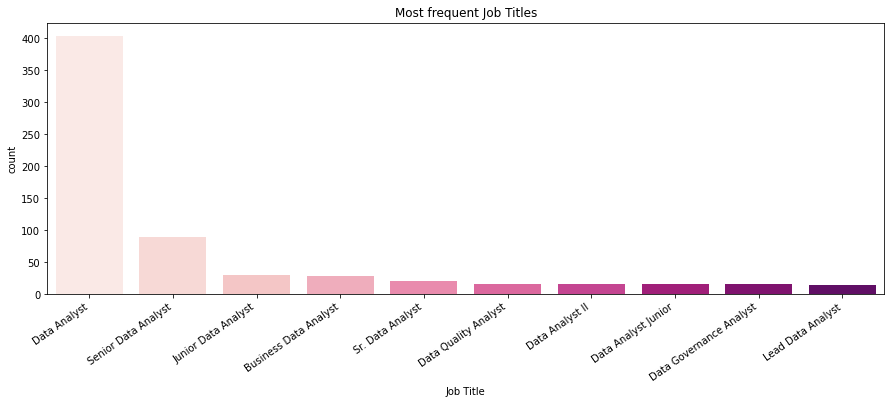

In [53]:
fig=plt.figure(figsize=(15,5))
chart=sns.countplot(x='Job Title',data=df,order=pd.value_counts(df['Job Title']).iloc[:10].index,palette='RdPu')
chart.set_xticklabels(chart.get_xticklabels(), rotation=35, horizontalalignment='right')
chart.set_title(label='Most frequent Job Titles',loc='center')

### Data Analyst Salaries (MODIFIED)

In [54]:
datanalyst=df[df['Job Title']=='Data Analyst']
#datanalyst_salary=datanalyst['Salary Estimate']
# fig=px.histogram(datanalyst,x='Salary Estimate',marginal='box',title='Distribution of Data Analyst Salary Estimate')

# Modified the above to change size
fig=px.histogram(datanalyst,x='Salary Estimate',marginal='box',title='Distribution of Data Analyst Salary Estimate', width=1024, height=800)
fig.show()

### Salary distribution of entire dataset (MODIFIED)

In [55]:
# fig=px.histogram(df,x='Salary Estimate',marginal='box',title='Distribution of Data Analyst Salary Estimate')
# Modified the above to change size
fig=px.histogram(df,x='Salary Estimate',marginal='box',title='Distribution of Data Analyst Salary Estimate', width=1024, height=800)
fig.show()

### Scatterplot Matrix for Numerical Data (MODIFIED)


In [56]:
fig = px.scatter_matrix(df,dimensions=['Salary Estimate','Rating','Revenue','Size'])
# Modified the above to change size
fig = px.scatter_matrix(df,dimensions=['Salary Estimate','Rating','Revenue','Size'], width=1024, height=1000)
fig.show()

### Bar chart

<AxesSubplot:xlabel='Headquarters', ylabel='count'>

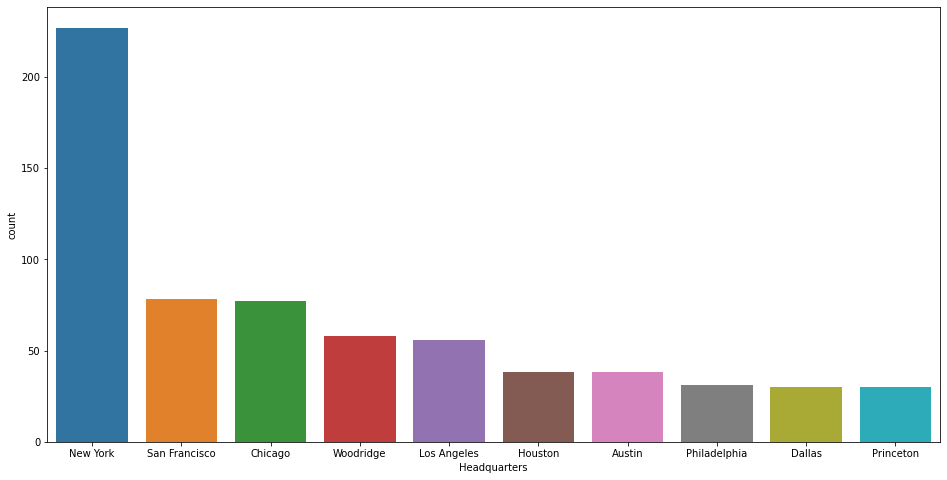

In [57]:
fig = plt.figure(figsize=(16,8))
qualitative_colors = sns.color_palette("Set2_r", 5)
sns.countplot(x='Headquarters',data=df,order=pd.value_counts(df['Headquarters']).iloc[:10].index)

### MODIFIED

In [58]:
# fig = px.sunburst(df, path=['Location', 'Headquarters'], values='Salary Estimate')
# Modified to add Size
fig = px.sunburst(df, path=['Location', 'Headquarters'], values='Salary Estimate', width=1024, height=800)
fig.show()

In [59]:
# fig = px.pie(df, values='Salary Estimate', names='Industry', title='Salary Estimate of each Industry')
# Modified to add size
fig = px.pie(df, values='Salary Estimate', names='Industry', title='Salary Estimate of each Industry', width=1024, height=900)

fig.show()

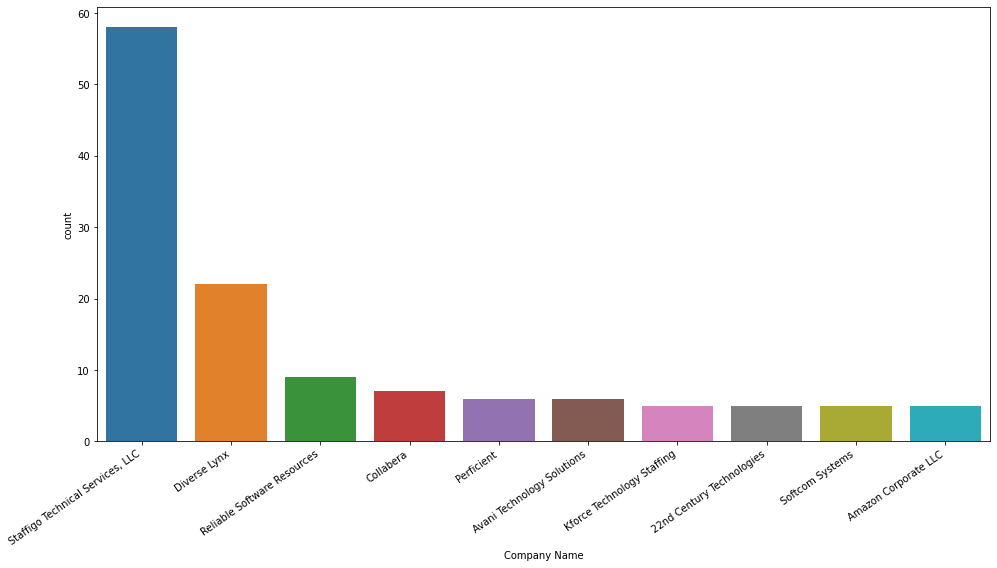

In [60]:
df_sub=df[df['Industry']=='IT Services']
fig = plt.figure(figsize=(16,8))
qualitative_colors = sns.color_palette("pastel", 5)
chart=sns.countplot(x='Company Name',data=df_sub,order=pd.value_counts(df_sub['Company Name']).iloc[:10].index)
y=chart.set_xticklabels(chart.get_xticklabels(), rotation=35, horizontalalignment='right')
#sns.countplot(x='Company Name',data=df_sub)
#print(df_sub)

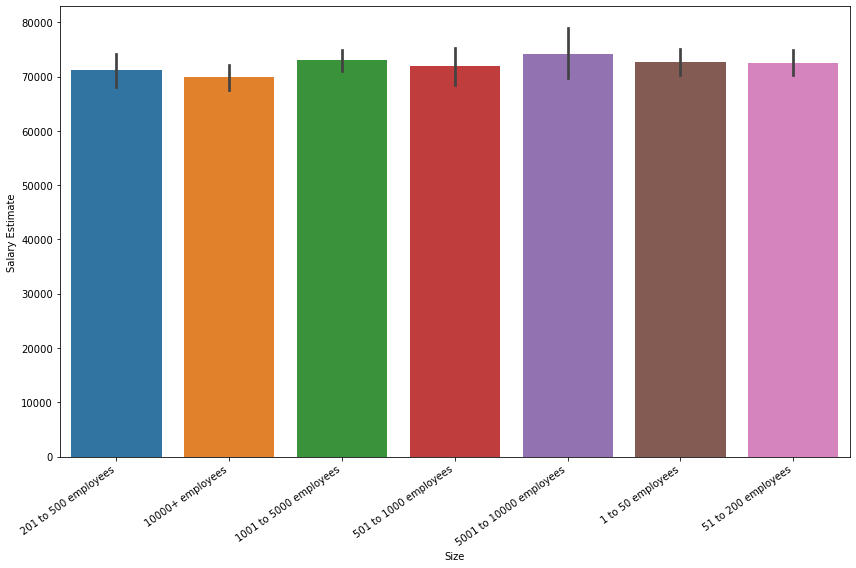

In [61]:
fig=plt.figure(figsize=(12,8))
chart=sns.barplot(data=df,x='Size',y='Salary Estimate')
chart.set_xticklabels(chart.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.tight_layout()

In [62]:
# import plotly.graph_objects as go
# import plotly.express as px
# import numpy as np
# import pandas as pd
# df = px.data.tips()
# fig = go.Figure(go.Sunburst(
#     labels=["Female", "Male", "Dinner", "Lunch", 'Dinner ', 'Lunch '],
#     parents=["", "", "Female", "Female", 'Male', 'Male'],
#     values=np.append(
#         df.groupby('sex').tip.mean().values,
#         df.groupby(['sex', 'time']).tip.mean().values),
#     marker=dict(colors=px.colors.sequential.Emrld)),
#                 layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)',
#                                  plot_bgcolor='rgba(0,0,0,0)'))

# fig.update_layout(margin=dict(t=0, l=0, r=0, b=0),
#                   title_text='Tipping Habbits Per Gender, Time and Day')
# fig.show()

In [63]:
# # df = px.data.tips()
# fig = go.Figure(go.Sunburst(
#     labels=df["Sector"],
#     parents=["", "", "Female", "Female", 'Male', 'Male'],
#     values=df["Industry"],
# #     values=np.append(
# #         df.groupby('Sector')["Industry"].value_counts().values,
# #         df.groupby(['Sector', 'Location'])["Rating"].mean().values),
#     marker=dict(colors=px.colors.sequential.Emrld)),
#                 layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)',
#                                  plot_bgcolor='rgba(0,0,0,0)'))

# fig.update_layout(margin=dict(t=0, l=0, r=0, b=0),
#                   title_text='Tipping Habbits Per Gender, Time and Day')
# fig.show()